## Javad Ranjbar Kermani
## 400209795
## Question 7, part a
## CNN- Transfer learning with VGG16

In [1]:
## import libraries
import torch
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt

In [2]:
print(torch.__version__)
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f'The device is {device}')

1.13.1+cu116
The device is cuda


In [3]:
BATCH_SIZE = 256

## transformations
transform = transforms.Compose(
    [transforms.ToTensor(), transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])

## download and load training dataset
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=BATCH_SIZE,
                                          shuffle=True, num_workers=2)

## download and load testing dataset
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=BATCH_SIZE,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog',
           'horse', 'ship', 'truck')
print(type(classes))

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
<class 'tuple'>


tensor([6, 4, 1, 2, 9, 2, 1, 5, 8, 7, 8, 0, 5, 0, 9, 8, 4, 3, 4, 3, 4, 0, 7, 9,
        3, 6, 8, 5, 4, 8, 9, 1, 2, 1, 0, 0, 0, 6, 4, 5, 0, 6, 4, 1, 6, 7, 5, 9,
        1, 8, 6, 6, 0, 1, 8, 1, 0, 3, 4, 8, 7, 9, 0, 7, 5, 3, 1, 1, 4, 0, 0, 2,
        2, 2, 2, 3, 0, 5, 3, 8, 1, 6, 3, 5, 4, 2, 0, 1, 6, 6, 5, 3, 2, 6, 4, 9,
        7, 3, 1, 9, 9, 8, 2, 1, 3, 8, 8, 4, 6, 8, 9, 5, 2, 5, 1, 2, 2, 9, 5, 7,
        1, 8, 0, 9, 4, 4, 5, 0, 2, 9, 5, 4, 0, 3, 1, 8, 5, 2, 2, 8, 4, 0, 0, 0,
        1, 9, 0, 5, 3, 3, 5, 2, 7, 5, 2, 8, 1, 1, 9, 4, 8, 8, 9, 8, 5, 3, 9, 4,
        2, 2, 3, 2, 3, 4, 5, 6, 5, 4, 5, 3, 6, 0, 9, 2, 5, 3, 4, 8, 0, 2, 1, 3,
        7, 2, 1, 3, 7, 4, 1, 8, 1, 6, 4, 7, 3, 0, 9, 6, 1, 1, 5, 8, 8, 5, 7, 5,
        1, 4, 1, 5, 9, 8, 2, 9, 0, 9, 6, 3, 1, 3, 0, 9, 0, 8, 0, 5, 6, 2, 2, 0,
        5, 9, 2, 2, 7, 8, 2, 6, 5, 4, 7, 9, 8, 1, 5, 9]) 

frog  deer  car   bird  truck bird  car   dog   ship  horse ship  plane dog   plane truck ship  deer  cat   deer  cat   deer  plane horse tru

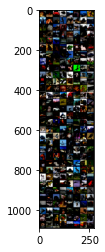

In [4]:
import matplotlib.pyplot as plt
import numpy as np

## functions to show an image
def imshow(img):
    #img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

## get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

## show images
imshow(torchvision.utils.make_grid(images))
print(labels,'\n')
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(BATCH_SIZE)),'\n')

In [5]:
for images, labels in trainloader:
    print("Image batch dimensions:", images.shape)
    print("Image label dimensions:", labels.shape)
    break

Image batch dimensions: torch.Size([256, 3, 32, 32])
Image label dimensions: torch.Size([256])


In [6]:
from torch import nn
import torch.nn.functional as F
# class for deleting the average pooling in the last convoloutinal layer
class delete(nn.Module):
  def __init__(self):
    super(delete,self).__init__()
  def forward(self,x):
    return x

In [7]:
#importing and pretraining the Vgg16 model
model = torchvision.models.vgg16(pretrained = True)
for params in model.parameters():
  params.required_grad = False # the convoloutional layer weight and parameter won't change
print(model)

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth


  0%|          | 0.00/528M [00:00<?, ?B/s]

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [8]:
model.avgpool = delete() #deleting the average pooling in the last convoloutinal layer
model.classifier = nn.Sequential(nn.Linear(512,100),nn.ReLU(),nn.Dropout(0.4),nn.Linear(100,50) #replacing the sequential layer 
      ,nn.ReLU(),nn.Dropout(0.4),nn.Linear(50,10))
model = model.to(device)
print(model)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [9]:
import torch.optim as optim
criterion = nn.CrossEntropyLoss() # loss function
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum = 0.9) # stochastic gradient descent optimizer

In [10]:
epoch = 10 # number of epochs
train_loss_history = []
train_corrects_history = []
test_loss_history = []
test_corrects_history = []

for e in range(epoch):
  train_loss = 0
  train_corrects = 0
  test_loss = 0
  test_corrects = 0

  for inputs, labels in trainloader:
    inputs = inputs.to(device)
    labels = labels.to(device)
    outputs = model(inputs) # every batch is put as an input
    loss = criterion(outputs, labels) # Calc loss after each batch by comparing it to actual labels

    optimizer.zero_grad() # setting the initila gradient to zero
    loss.backward() # backpropagation the loss
    optimizer.step() # optimizing the weights and bias values for every single step
    
    _, preds = torch.max(outputs, 1) # taking the highest value of prediction
    train_loss += loss.item() # calculating the loss and adding to train_loss
    train_corrects += torch.sum(preds == labels.data) # calculating the accuracy by taking the sum of all correct prediction in a batch
  with torch.no_grad(): # no need fo gradient
    for test_inputs , test_labels in testloader:
      test_inputs = test_inputs.to(device)
      test_labels = test_labels.to(device)
      test_outputs = model(test_inputs) # every batch is put as an input
      loss_ = criterion(test_outputs,test_labels) # Calc loss after each batch by comparing it to actual labels
      _, test_preds = torch.max(test_outputs, 1) # taking the highest value of prediction
      test_loss += loss_.item() # calculating the loss and adding to train_loss
      test_corrects += torch.sum(test_preds == test_labels.data) # calculating the accuracy by taking the sum of all correct prediction in a batch
  
  epoch_loss = train_loss/(len(trainloader)) # training loss per epoch
  epoch_acc = train_corrects/(len(trainloader)*BATCH_SIZE)*100 # training accuracy per epoch
  train_loss_history.append(epoch_loss)
  train_corrects_history.append(epoch_acc.cpu().numpy())

  test_epoch_loss = test_loss/(len(testloader))# testing loss per epoch
  test_epoch_acc = test_corrects/(len(testloader)*BATCH_SIZE)*100 # testing accuracy per epoch
  test_loss_history.append(test_epoch_loss)
  test_corrects_history.append(test_epoch_acc.cpu().numpy())

  print('epoch :', (e+1))
  print('train loss: {:.4f}, train acc: {:.4f} '.format(epoch_loss, epoch_acc.item()))
  print('test loss: {:.4f}, test acc: {:.4f} '.format(test_epoch_loss, test_epoch_acc.item()))
       

epoch : 1
train loss: 1.1595, train acc: 60.5449 
test loss: 0.7083, test acc: 77.1777 
epoch : 2
train loss: 0.5808, train acc: 82.3083 
test loss: 0.5534, test acc: 81.6895 
epoch : 3
train loss: 0.4380, train acc: 86.6629 
test loss: 0.5854, test acc: 81.6211 
epoch : 4
train loss: 0.3483, train acc: 89.4173 
test loss: 0.5126, test acc: 83.7500 
epoch : 5
train loss: 0.2689, train acc: 91.7012 
test loss: 0.4794, test acc: 84.9805 
epoch : 6
train loss: 0.2106, train acc: 93.5049 
test loss: 0.4427, test acc: 85.1074 
epoch : 7
train loss: 0.1670, train acc: 94.7585 
test loss: 0.5654, test acc: 84.7656 
epoch : 8
train loss: 0.1389, train acc: 95.6792 
test loss: 0.5650, test acc: 84.8730 
epoch : 9
train loss: 0.1123, train acc: 96.4246 
test loss: 0.5628, test acc: 85.4492 
epoch : 10
train loss: 0.1003, train acc: 96.8610 
test loss: 0.6360, test acc: 85.3125 


In [11]:
# saving the model
PATH2 = './Q7_c.h5'
torch.save(model.state_dict(), PATH2)

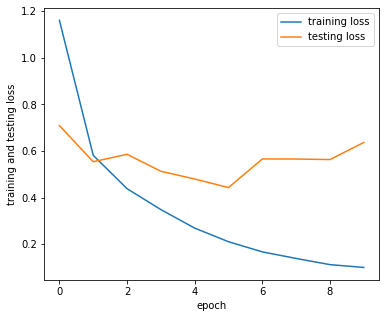

In [12]:
# plot test and train loss with respect to number of epochs
plt.figure(figsize=(6,5))
plt.plot(train_loss_history, label= 'training loss')
plt.plot(test_loss_history, label= 'testing loss')
plt.xlabel('epoch')
plt.ylabel('training and testing loss')
plt.legend()
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

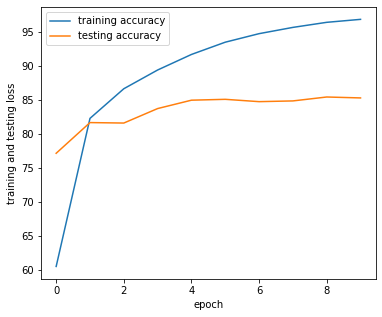

In [13]:
# plot test and train accuracy with respect to number of epochs
plt.figure(figsize=(6,5))
plt.plot(train_corrects_history, label= 'training accuracy')
plt.plot(test_corrects_history, label= 'testing accuracy')
plt.xlabel('epoch')
plt.ylabel('training and testing loss')
plt.legend()
plt.show

In [14]:
model.load_state_dict(torch.load(PATH2))
images = images.to(device)
outputs = model(images)
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(4)))

Predicted:  dog   car   horse plane


In [15]:
#accuracy of each class
from sklearn.metrics import confusion_matrix
correct = 0
total = 0
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

with torch.no_grad():
    for data in testloader:
        images, labels = data
        images = images.to(device)
        labels = labels.cpu()
        outputs = model(images).cpu()
        _, predictions = torch.max(outputs, 1)
        all
        total += labels.size(0)
        correct += (predictions == labels).sum().item()
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            cm = confusion_matrix(labels, predictions)
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1

# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')
print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy for class: plane is 84.8 %
Accuracy for class: car   is 94.1 %
Accuracy for class: bird  is 84.6 %
Accuracy for class: cat   is 75.5 %
Accuracy for class: deer  is 91.0 %
Accuracy for class: dog   is 79.5 %
Accuracy for class: frog  is 96.1 %
Accuracy for class: horse is 82.6 %
Accuracy for class: ship  is 93.7 %
Accuracy for class: truck is 91.6 %
Accuracy of the network on the 10000 test images: 87 %


In [16]:
# confusion matrix
from itertools import product
all_labels, all_predictions = [], []
correct = 0
total = 0
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

with torch.no_grad():
    for data in testloader:
        images, labels = data
        images = images.to(device)
        labels = labels.cpu()
        outputs = model(images).cpu()
        _, predictions = torch.max(outputs, 1)
        all_labels.extend(labels.to('cpu'))
        all_predictions.extend(predictions.to('cpu'))
        total += labels.size(0)
        correct += (predictions == labels).sum().item()
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1
all_predictions = all_predictions
all_predictions = np.array(all_predictions)
all_labels = np.array(all_labels)
class_labels = np.unique(np.concatenate((all_labels, all_predictions)))
if class_labels.shape[0] == 1:
  if class_labels.shape[0] != 0:
    class_labels = np.array([0, class_labels[0]])
  else:
    class_labels = np.array([class_labels[0], 1])
n_labels = class_labels.shape[0]
lst =[]
z = list(zip(all_labels, all_predictions))
for combi in product(class_labels, repeat=2):
  lst.append(z.count(combi))
mat = np.asarray(lst)[:, None].reshape(n_labels, n_labels)
print(mat)


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')
print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

[[853   6  23  13  21   2  19   7  28  28]
 [  3 940   3   2   1   0   9   1   7  34]
 [ 11   1 841  26  44  22  45   5   3   2]
 [  5   1  22 752  40  93  77   4   3   3]
 [  2   1  20  17 918  12  18  11   1   0]
 [  0   0  17 143  24 787  24   4   0   1]
 [  1   0   8  16  12   2 960   0   1   0]
 [  7   1  13  21  46  66  11 832   2   1]
 [ 20   9   6   3   5   0   8   1 940   8]
 [  8  38   2   3   4   0  10   2  14 919]]
Accuracy for class: plane is 85.3 %
Accuracy for class: car   is 94.0 %
Accuracy for class: bird  is 84.1 %
Accuracy for class: cat   is 75.2 %
Accuracy for class: deer  is 91.8 %
Accuracy for class: dog   is 78.7 %
Accuracy for class: frog  is 96.0 %
Accuracy for class: horse is 83.2 %
Accuracy for class: ship  is 94.0 %
Accuracy for class: truck is 91.9 %
Accuracy of the network on the 10000 test images: 87 %


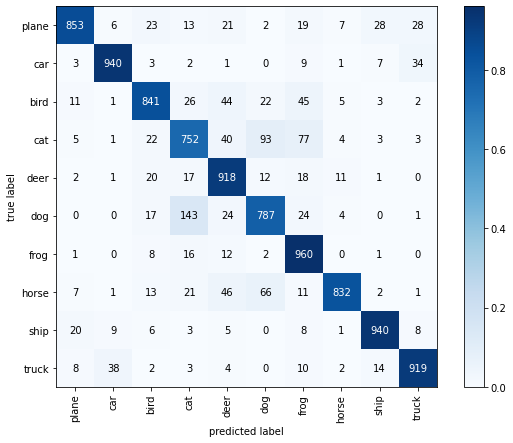

In [17]:
# plotting the confusion matrix
classes = {0: 'plane', 1:'car', 2:'bird', 3:'cat', 4:'deer', 5:'dog', 6:'frog',
           7:'horse', 8:'ship', 9:'truck'}

total_samples = mat.sum(axis=1)[:, np.newaxis]
normed_conf_mat = mat.astype('float') / total_samples
figsize = (10,7)
fig, ax = plt.subplots(figsize=figsize)
ax.grid(False)
matshow = ax.matshow(normed_conf_mat, cmap=plt.cm.Blues)
fig.colorbar(matshow)
for i in range(mat.shape[0]):
    for j in range(mat.shape[1]):
        cell_text = ""
        cell_text += format(mat[i, j], 'd')
        ax.text(x=j,
                y=i,
                s=cell_text,
                va='center',
                ha='center',
                color="white" if normed_conf_mat[i, j] > 0.5 else "black")    
tick_marks = np.arange(len(classes.values()))
plt.xticks(tick_marks, classes.values(), rotation=90)
plt.yticks(tick_marks, classes.values())
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()